# Analysis of the swiss electricity production data sources

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

### Load enr model data

In [18]:
import pandas as pd

enr_prod_all = pd.read_csv(f'../support_files/enr_prod_2016-2022_completed.csv', index_col=0, parse_dates=[0])
enr_prod_all = enr_prod_all.apply(lambda x: x/1000)

In [19]:
enr_prod_all[['Wind', 'Solar']]

,Wind,Solar
2016-01-01 00:00:00,1.745106,0.005137
2016-01-01 01:00:00,2.467628,0.053528
2016-01-01 02:00:00,2.353698,0.043627
2016-01-01 03:00:00,2.850827,0.033897
2016-01-01 04:00:00,2.406694,0.031061
...,...,...
2022-12-31 19:00:00,52.294425,0.378138
2022-12-31 20:00:00,51.756704,0.293561
2022-12-31 21:00:00,56.297081,0.233298
2022-12-31 22:00:00,54.254986,0.184694


In [20]:
#pronovo_data = read_pronovo_residuals('../support_files/pronovo_reports', my_config.start, my_config.end)
#pronovo_data

### Load EcoDynElec/ENTSOE data

In [21]:
from ecodynelec.parameter import Parameter
from ecodynelec.progress_info import ProgressInfo

# EcoDynElec configuration
my_config = Parameter()
my_config.freq = "H"
my_config.ctry = ['AT', 'CH', 'DE', 'FR', 'IT']
my_config.target = ['CH']  # You can put multiple targets here
my_config.data_cleaning = True
my_config.sg_imports = True
my_config.path.generation = "../examples/mix_analysis/downloads/generations/"
my_config.path.exchanges = "../examples/mix_analysis/downloads/exchanges/"
# Recommended config: include swiss grid residual (difference between swiss grid and entso-e data)
my_config.residual_global = True

# Set dates
my_config.start = '2016-01-01 00:00'
my_config.end = '2022-12-31 23:59'
# Remove the enr model
my_config.ch_enr_model_path = None

In [22]:
my_config.server.useServer = False
my_config.server.username = 'aymericb5@gmail.com'
my_config.server.password = '8.U#Mf48nZn!eqc'

In [23]:
from ecodynelec.preprocessing.auxiliary import get_default_file
from ecodynelec.pipelines import get_prod_mix_impacts

flows, prod_mix, mix, prod_impacts, impacts = get_prod_mix_impacts(config=my_config, progress_bar=ProgressInfo(), is_verbose=False)


KeyboardInterrupt



In [10]:
from ecodynelec.pipeline_functions import get_producing_mix_kwh

prod_df = get_producing_mix_kwh(flows, prod_mix)

## TODO comparaison pourcentages selon années

In [16]:
prod_df.loc['2021', ['Solar_CH', 'Wind_Onshore_CH']].sum(axis=0)

Solar_CH           2501699.373419
Wind_Onshore_CH     130801.140132
dtype: object

In [24]:
enr_prod_all.loc['2021', ['Solar', 'Wind']].sum(axis=0)

Solar    2.842596e+06
Wind     1.421723e+05
dtype: float64

## Hydraulic and solar productions comparison

Annual comparison for the hydraulic and solar productions, between the available sources for the year 2021, is given in the excel file **"ComparaisonSourcesDesDonnées.xlsx"**.
The conclusions of this analysis are in the internship report of Aymeric Bourdy.

The following figures give a more detailed comparison of the hydraulic production, with a decomposition of the different types of hydraulic productions.

*The conclusions of this analysis are in the internship report of Aymeric Bourdy.*

#### Hydraulic production decomposition

Compare hydraulic productions provided by EnergyCharts and data used in EcoDynElec (from ENTSOE, OFEN and SwissGrid data).
The EnergyCharts data comes from [...].

In [31]:
from ecodynelec.pipeline_functions import get_producing_mix_kwh

raw_prod = get_producing_mix_kwh(flows, prod_mix)
raw_prod = raw_prod.loc['2021']
raw_prod_daily = raw_prod.resample('D').sum()

In [28]:
import matplotlib.pyplot as plt
# change font size
plt.rcParams.update({'font.size': 12})

In [30]:
import pandas as pd
charts = pd.read_csv('../support_files/energy-charts_Production_d\'électricité_journalière__en_Suisse2021.csv', index_col=0)
charts = charts.drop(index=charts.index[0])
charts.dropna(how='all', axis=1, inplace=True)
charts = charts.applymap(lambda x: float(x))
charts = charts * 1000
charts

,Eaux usées,Eau de drainage,Débits résiduels (barrages),Hydraulique fil de l'eau,"Stockage par Pompage, pompée","Stockage par Pompage, naturel",Eau de Stockage,Eau potable
Jour,,,,,,,,
01.01.2021,24.97,11836.93,666.86,11621.45,3302.07,7559.67,13851.63,506.06
02.01.2021,23.17,11851.03,685.66,11261.68,2847.64,6519.32,16056.72,507.40
03.01.2021,21.75,11298.39,676.00,10836.45,3504.17,8022.37,10754.37,500.54
04.01.2021,22.28,14969.75,687.68,12897.56,13084.63,29955.65,31677.27,494.53
05.01.2021,22.08,15251.05,696.31,12681.86,15404.15,35265.90,32824.25,492.40
...,...,...,...,...,...,...,...,...
27.12.2021,38.90,11910.03,779.41,13389.63,4384.18,10037.03,9753.01,355.53
28.12.2021,39.92,13550.79,791.91,15864.94,5016.84,11485.43,11338.35,373.36
29.12.2021,43.45,16237.49,778.29,19412.78,5907.22,13523.84,13360.23,422.87


Compare run of river productions

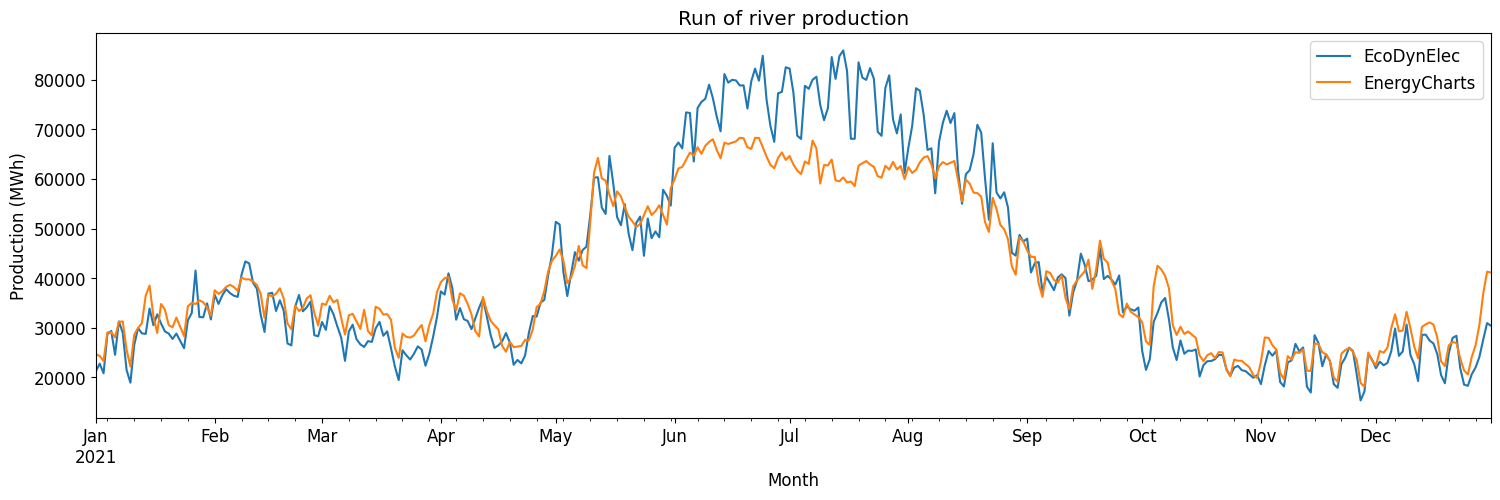

In [32]:
import matplotlib.pyplot as plt
raw_prod_daily[['Residual_Hydro_Run-of-river_and_poundage_CH', 'Hydro_Run-of-river_and_poundage_CH']].sum(axis=1).plot(figsize=(18,5))
charts.index = raw_prod_daily.index
charts[['Eaux usées', 'Eau de drainage', 'Débits résiduels (barrages)', 'Hydraulique fil de l\'eau', 'Eau potable']].sum(axis=1).plot(figsize=(18,5))
plt.legend(['EcoDynElec', 'EnergyCharts'])
plt.xlabel('Month')
plt.ylabel('Production (MWh)')
plt.title('Run of river production');

Add OFEN data with a monthly view

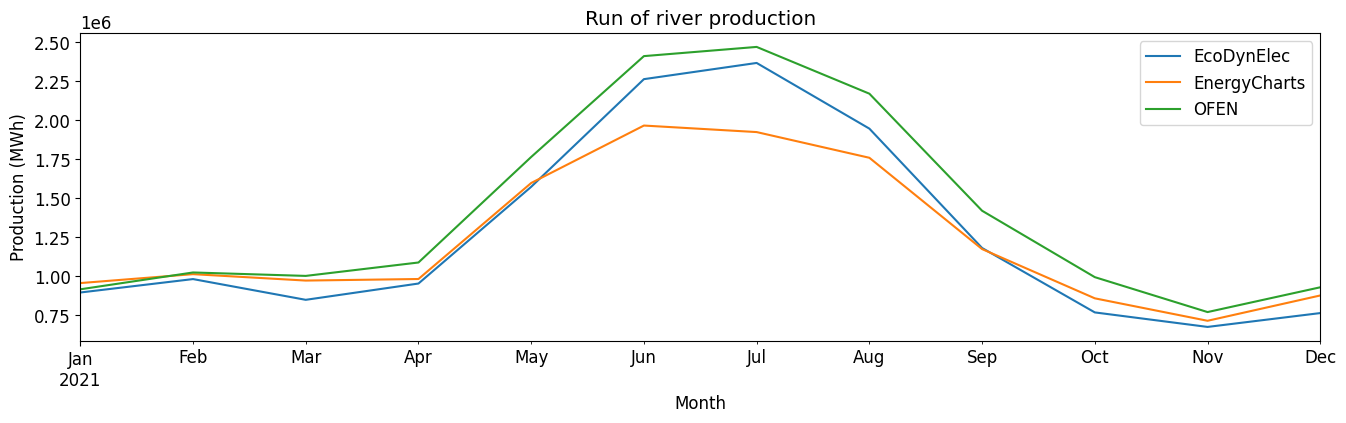

In [34]:
# Data extracted from the annual report of the OFEN for 2021 (https://www.bfe.admin.ch/bfe/fr/home/approvisionnement/statistique-de-l-electricite/rapports-annuels-sur-l-electricite.html)
ofen_data_rov = [916, 1024, 1002, 1088, 1765, 2412, 2471, 2171, 1420, 994, 770, 929]
ofen_data_rov = [x * 1000 for x in ofen_data_rov]
ofen_data_rov = pd.Series(ofen_data_rov, index=pd.date_range('2021-01-01', '2021-12-31', freq='M'))

raw_prod_daily[['Residual_Hydro_Run-of-river_and_poundage_CH', 'Hydro_Run-of-river_and_poundage_CH']].sum(axis=1).resample('M').sum().plot(figsize=(16,4))
charts[['Eaux usées', 'Eau de drainage', 'Débits résiduels (barrages)', 'Hydraulique fil de l\'eau', 'Eau potable']].sum(axis=1).resample('M').sum().plot(figsize=(16,4))
ofen_data_rov.plot(figsize=(16,4))
plt.legend(['EcoDynElec', 'EnergyCharts', 'OFEN'])
plt.xlabel('Month')
plt.ylabel('Production (MWh)')
plt.title('Run of river production');
#plt.savefig('./compare_before_after_residual/figures/am_hydro_2.png', dpi=300, bbox_inches='tight')

Compare water reservoir productions

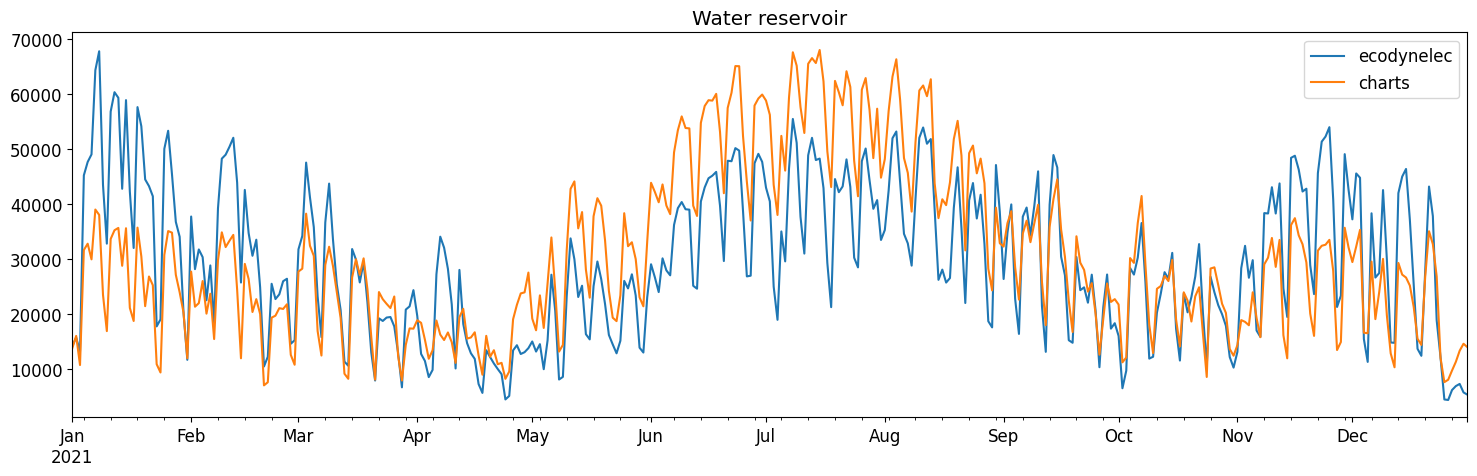

In [38]:
import matplotlib.pyplot as plt
raw_prod_daily[['Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(18,5))
charts.index = raw_prod_daily.index
charts[['Eau de Stockage']].sum(axis=1).plot(figsize=(18,5))
#dallee[['Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(20,4))
plt.legend(['ecodynelec', 'charts'])
plt.title('Water reservoir');

Compare pumped storage productions

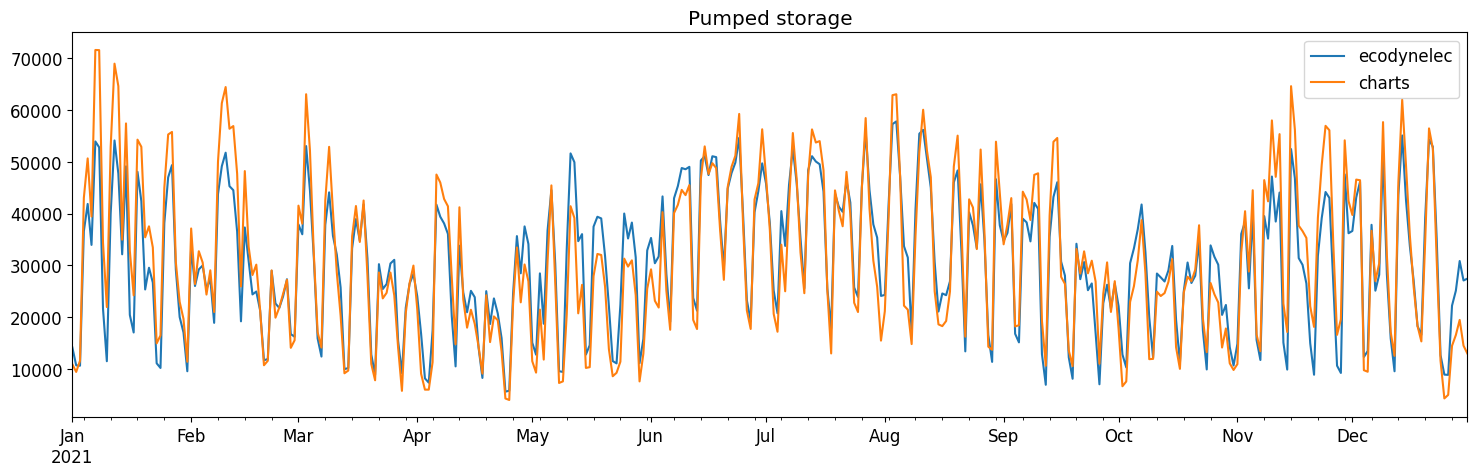

In [35]:
import matplotlib.pyplot as plt
raw_prod_daily[['Hydro_Pumped_Storage_CH', 'Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(18,5))
charts.index = raw_prod_daily.index
charts[['Stockage par Pompage, naturel', 'Stockage par Pompage, pompée']].sum(axis=1).plot(figsize=(18,5))
#dallee[['Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(20,4))
plt.legend(['ecodynelec', 'charts'])
plt.title('Pumped storage');

Compare water reservoir + pumped storage productions

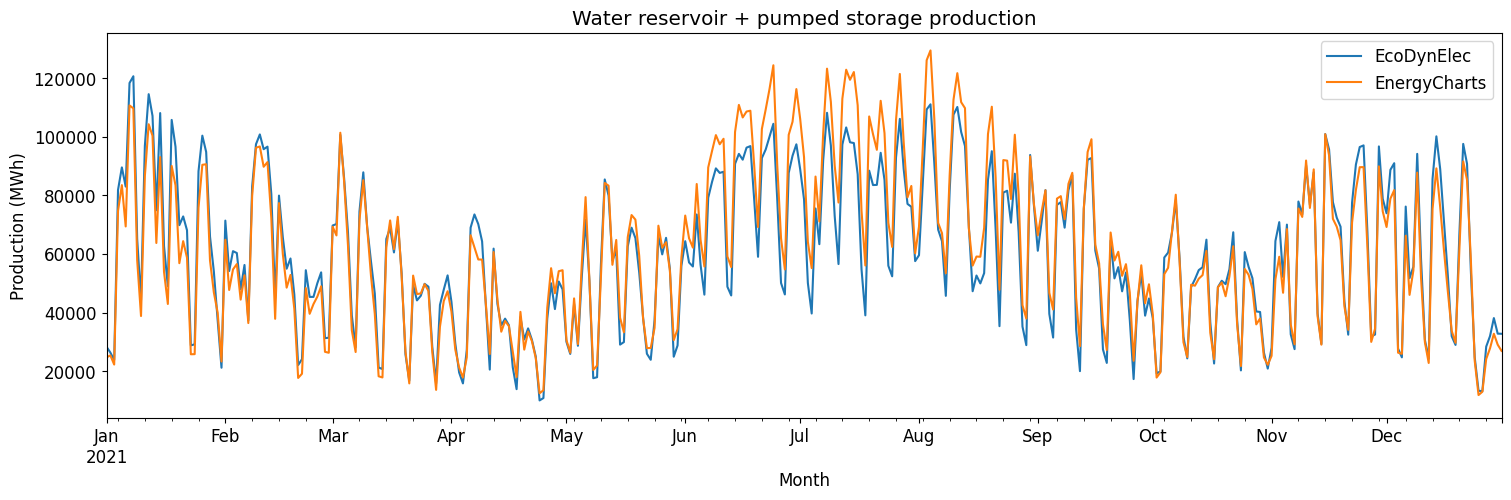

In [36]:
import matplotlib.pyplot as plt
raw_prod_daily[['Hydro_Water_Reservoir_CH', 'Hydro_Pumped_Storage_CH', 'Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(18,54))
charts.index = raw_prod_daily.index
charts[['Eau de Stockage', 'Stockage par Pompage, naturel', 'Stockage par Pompage, pompée']].sum(axis=1).plot(figsize=(18,5))
#dallee[['Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).plot(figsize=(20,4))
plt.legend(['EcoDynElec', 'EnergyCharts'])
plt.xlabel('Month')
plt.ylabel('Production (MWh)')
plt.title('Water reservoir + pumped storage production');

Add OFEN data with a monthly view

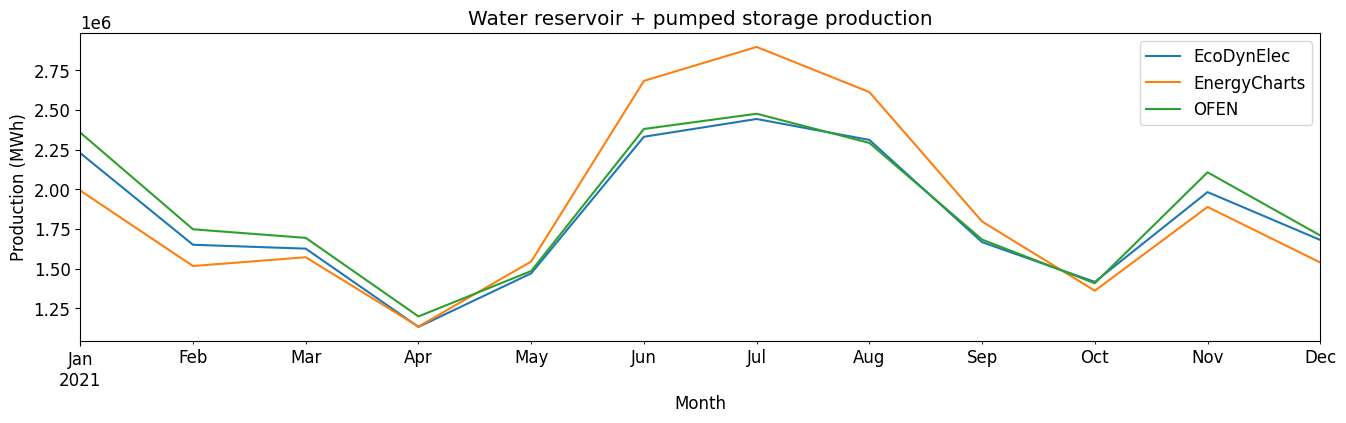

In [38]:
ofen_data_wr = [2357, 1748, 1694, 1199, 1485, 2380, 2476, 2292, 1683, 1408, 2107, 1709]
ofen_data_wr = [x * 1000 for x in ofen_data_wr]
ofen_data_wr = pd.Series(ofen_data_wr, index=pd.date_range('2021-01-01', '2021-12-31', freq='M'))

raw_prod_daily[['Hydro_Water_Reservoir_CH', 'Hydro_Pumped_Storage_CH', 'Residual_Hydro_Water_Reservoir_CH']].sum(axis=1).resample('M').sum().plot(figsize=(16,4))
charts[['Eau de Stockage', 'Stockage par Pompage, naturel', 'Stockage par Pompage, pompée']].sum(axis=1).resample('M').sum().plot(figsize=(16,4))
ofen_data_wr.plot(figsize=(16,4))
plt.legend(['EcoDynElec', 'EnergyCharts', 'OFEN'])
plt.xlabel('Month')
plt.ylabel('Production (MWh)')
plt.title('Water reservoir + pumped storage production');
#plt.savefig('./compare_before_after_residual/figures/am_hydro_3.png', dpi=300, bbox_inches='tight');